In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import style
import warnings
from collections import Counter

## K-Neighor algorithm on breast - cancer dataset

In [16]:
# building our practical implementation of K-Neighours
# The breast - cancer dataset is saved as 'data.csv'

In [2]:
dataset  = {'k':[[2,5],[3,4],[3,6]], 'r':[[5,7],[6,7],[7,6]]}
new_features = [2,6]

In [3]:
def k_nearest_neighor(data, predict, k = 3):
    if len(data) > k:
        warning.warn("K is set to value less than length of groups")
        
    distances = []
    for group in data:
        for features in data[group]:
            eucli_dis = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([eucli_dis, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k

    return vote_result, confidence 

In [7]:
result  = k_nearest_neighor(dataset, new_features, k = 3)[0]
print(result)

k


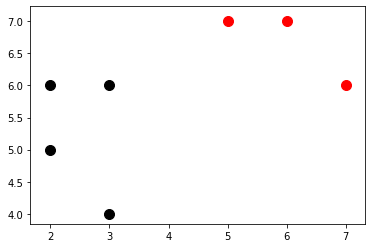

In [8]:
[[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]

plt.scatter(new_features[0], new_features[1], s = 100, c = result )

plt.show()

### Here we proceed with actual dataset 

In [15]:
import pandas as pd
import random

df = pd.read_csv('F:\Jupyter\Breast cancer\data.csv') # 
df.replace('?', -99999, inplace = True) # just to make outliers
df.drop(['id'], 1, inplace = True)

full_data = df.astype(float).values.tolist() # astpe set bcoz some data treated as lis like


print(full_data[:5])  # [5, 1, 1, 1, 2, '1', 3, 1, 1, 2]  
print('                  ')
print("after shuffling")
print('                  ')
random.shuffle(full_data)
print(full_data[:5])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]
                  
after shuffling
                  
[[9.0, 6.0, 9.0, 2.0, 10.0, 6.0, 2.0, 9.0, 10.0, 4.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0]]


In [10]:
test_size = 0.2

train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [11]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [12]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighor(train_set, data, k = 3)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1


print("accuracy is : ", correct/total)

0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
accuracy is :  0.9712230215827338
